In [1]:
## load the data
setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/data/Master_data_file")
data <- read.csv("reproductive_mode_TWISST.popGenwins.csv", header=TRUE)
library("dplyr")
library("scales") 
library("DescTools")
library("moments")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
head(data)

,X,scaffold,output_order,start,end,mid,win_size,sites,lnL,topoC_count,⋯,Fst_arcana_n_sax,Fst_arcana_spain,Fst_compressa_n_sax,Fst_compressa_spain,Fst_n_sax_spain,LG,av,LG_map_position,inv_status,in_map
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
1,34585,Contig38152,38660,2870,6411,4296,3541,100,-1238.902,8204,⋯,0.2813,0.1166,0.1263,0.1858,0.2091,1,0.9655,1_0.9655,LGC1.1,1
2,34583,Contig38152,38661,6419,7922,7059,1503,100,-1490.080,7834,⋯,0.2816,0.1431,0.1299,0.1873,0.1905,1,0.9655,1_0.9655,LGC1.1,1
3,146514,Contig85185,136046,6140,15917,9729,9777,100,-2188.093,7824,⋯,0.0614,0.0581,0.0437,0.1343,0.0022,1,0.9655,1_0.9655,LGC1.1,1
4,76857,Contig48338,76199,23492,38137,30093,14645,100,-1348.566,7496,⋯,0.0987,0.1115,0.0669,0.2127,0.0987,1,0.9655,1_0.9655,LGC1.1,1
5,114234,Contig61183,109130,599,10982,7352,10383,100,-2994.609,7134,⋯,0.0420,0.1125,0.0250,0.1142,0.0505,1,0.9655,1_0.9655,LGC1.1,1
6,134278,Contig73180,126280,85827,103316,99512,17489,100,-1379.880,7133,⋯,0.1016,0.1192,0.1119,0.2810,0.0284,1,0.9655,1_0.9655,LGC1.1,1


In [3]:
colnames(data)

[1] "X"                    "scaffold"             "output_order"        
 [4] "start"                "end"                  "mid"                 
 [7] "win_size"             "sites"                "lnL"                 
[10] "topoC_count"          "topoA_count"          "topoB_couunt"        
[13] "topoC"                "topoA"                "topoB"               
[16] "high_topo1"           "scaffold.1"           "start_check"         
[19] "end_check"            "mid_check"            "sites_full"          
[22] "pi_Egglayer"          "pi_Brooder"           "dxy_Egglayer_Brooder"
[25] "Fst_Egglayer_Brooder" "scaffold.2"           "start_check_2"       
[28] "end_check_2"          "mid_check_2"          "sites_full_2"        
[31] "pi_arcana"            "pi_compressa"         "pi_n_sax"            
[34] "pi_spain"             "dxy_arcana_compressa" "dxy_arcana_n_sax"    
[37] "dxy_arcana_spain"     "dxy_compressa_n_sax"  "dxy_compressa_spain" 
[40] "dxy_n_sax_spain"      "Fst_arcana_compressa" "Fst_arcana_n_sax"    
[43] "Fst_arcana_spain"     "Fst_compressa_n_sax"  "Fst_compressa_spain" 
[46] "Fst_n_sax_spain"      "LG"                   "av"                  
[49] "LG_map_position"      "inv_status"           "in_map"

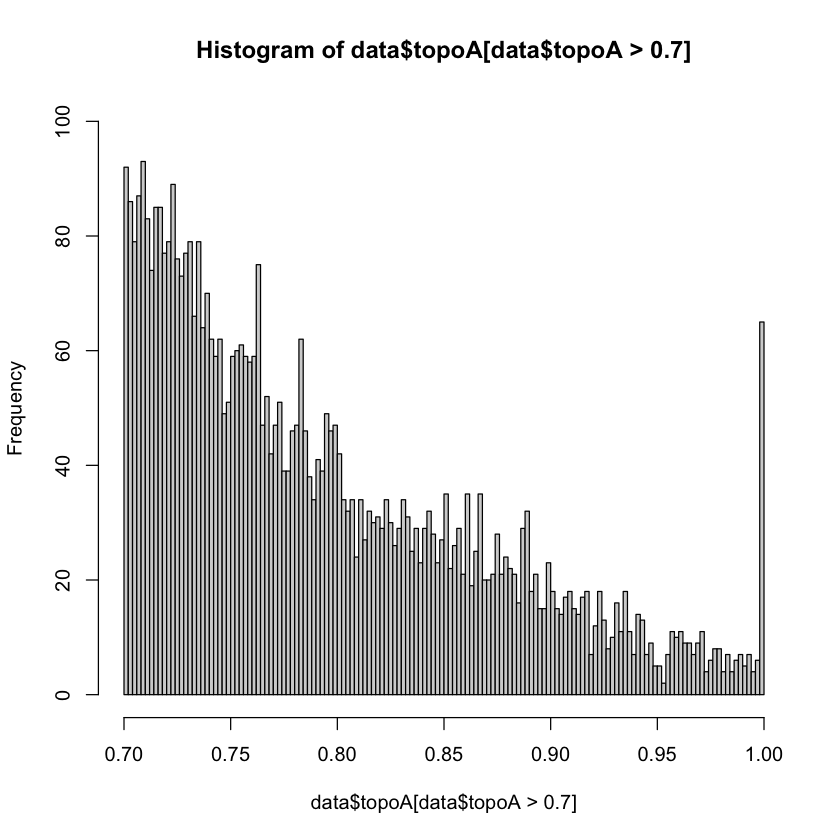

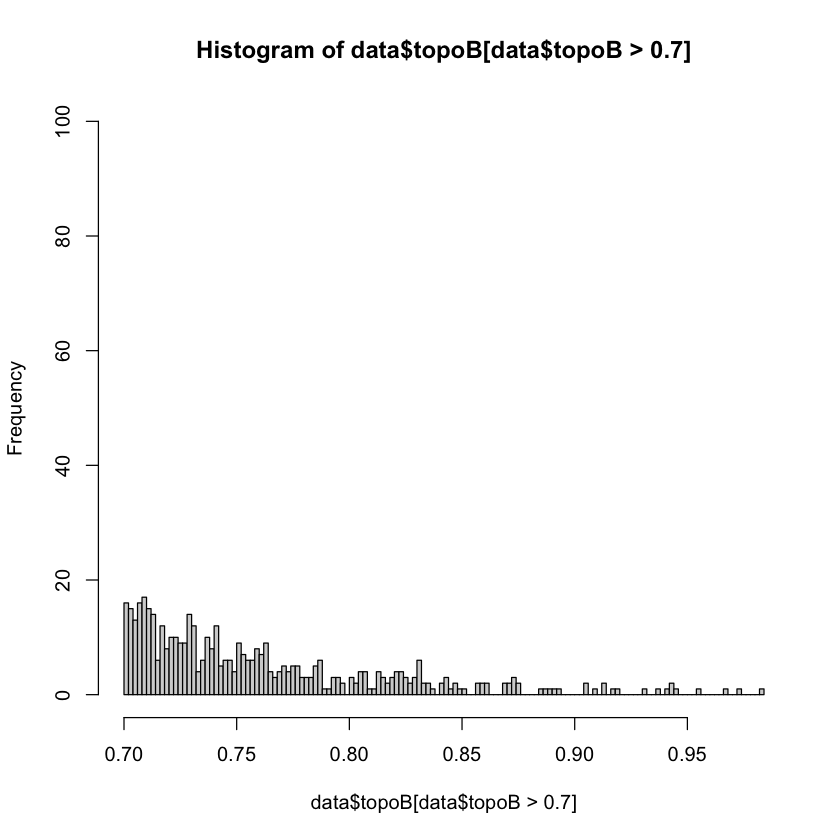

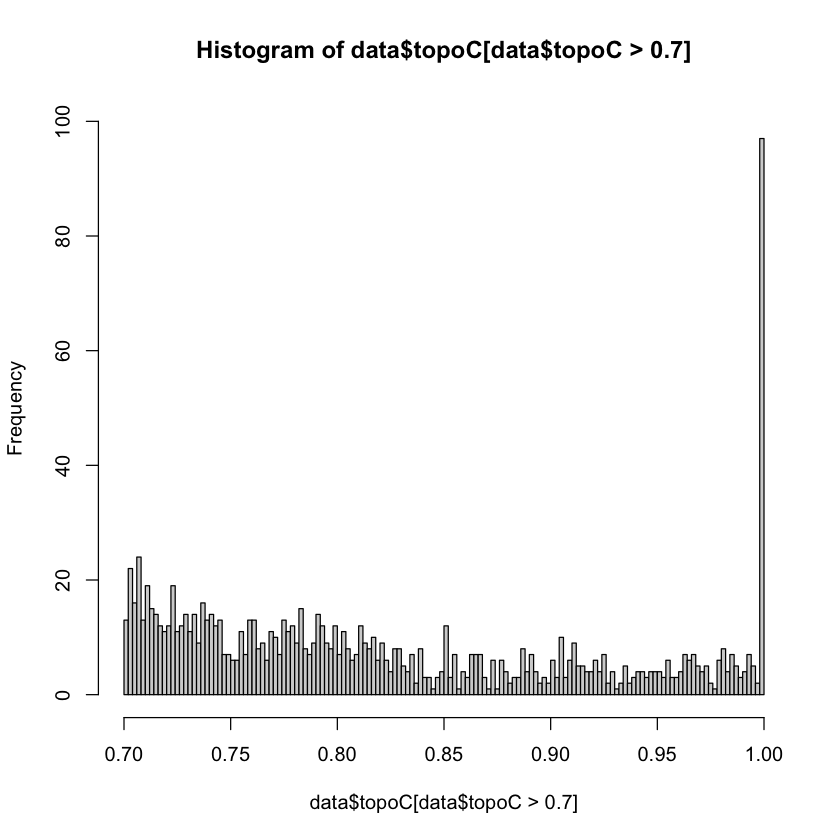

In [4]:
hist(data$topoA[data$topoA>0.7], breaks=200, ylim=c(0,100))
hist(data$topoB[data$topoB>0.7], breaks=200, ylim=c(0,100))
hist(data$topoC[data$topoC>0.7], breaks=200, ylim=c(0,100))

In [5]:
cor.test(data$pi_Brooder[data$topoC > 0.6], data$topoC[data$topoC > 0.6], method = "spearman")
cor.test(data$pi_Egglayer[data$topoC > 0.6], data$topoC[data$topoC > 0.6], method = "spearman")

cor.test(data$pi_Brooder[data$topoA > 0.6], data$topoA[data$topoA > 0.6], method = "spearman")
cor.test(data$pi_Egglayer[data$topoA > 0.6], data$topoA[data$topoA > 0.6], method = "spearman")

cor.test(data$pi_Brooder[data$topoB > 0.6], data$topoA[data$topoB > 0.6], method = "spearman")
cor.test(data$pi_Egglayer[data$topoB > 0.6], data$topoA[data$topoB > 0.6], method = "spearman")


Warning message in cor.test.default(data$pi_Brooder[data$topoC > 0.6], data$topoC[data$topoC > :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$pi_Brooder[data$topoC > 0.6] and data$topoC[data$topoC > 0.6]
S = 4528534033, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.256509 


Warning message in cor.test.default(data$pi_Egglayer[data$topoC > 0.6], data$topoC[data$topoC > :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$pi_Egglayer[data$topoC > 0.6] and data$topoC[data$topoC > 0.6]
S = 3448398985, p-value = 0.02262
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0431905 


Warning message in cor.test.default(data$pi_Brooder[data$topoA > 0.6], data$topoA[data$topoA > :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$pi_Brooder[data$topoA > 0.6] and data$topoA[data$topoA > 0.6]
S = 2.6567e+11, p-value = 4.143e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06775342 


Warning message in cor.test.default(data$pi_Egglayer[data$topoA > 0.6], data$topoA[data$topoA > :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$pi_Egglayer[data$topoA > 0.6] and data$topoA[data$topoA > 0.6]
S = 2.6401e+11, p-value = 6.285e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0610946 


Warning message in cor.test.default(data$pi_Brooder[data$topoB > 0.6], data$topoA[data$topoB > :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$pi_Brooder[data$topoB > 0.6] and data$topoA[data$topoB > 0.6]
S = 1206107246, p-value = 0.01027
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05777194 


Warning message in cor.test.default(data$pi_Egglayer[data$topoB > 0.6], data$topoA[data$topoB > :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$pi_Egglayer[data$topoB > 0.6] and data$topoA[data$topoB > 0.6]
S = 1240187717, p-value = 0.1667
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03114779 


In [6]:
data_tr1 <- subset(data,topoC == 1)
head(data_tr1)
length(data_tr1$topoC_count)

,X,scaffold,output_order,start,end,mid,win_size,sites,lnL,topoC_count,⋯,Fst_arcana_n_sax,Fst_arcana_spain,Fst_compressa_n_sax,Fst_compressa_spain,Fst_n_sax_spain,LG,av,LG_map_position,inv_status,in_map
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
11,23000,Contig2118,11478,102328,107302,104273,4974,100,-1751.667,10000,⋯,0.2030,0.2196,0.0841,0.2291,0.0336,1,22.4345,1_22.4345,collinear,1
20,22216,Contig2032,11035,53513,56923,54959,3410,100,-1352.231,10000,⋯,0.3311,0.1983,0.3351,0.3740,0.0221,1,31.3955,1_31.3955,collinear,1
21,22217,Contig2032,11034,42723,53508,47136,10785,100,-1230.754,10000,⋯,0.2487,0.1607,0.0911,0.1499,0.0059,1,31.3955,1_31.3955,collinear,1
78,3937,Contig108528,145224,615,29659,11105,29044,100,-1796.751,10000,⋯,0.2228,0.2582,0.0809,0.2665,0.0247,1,75.5340,1_75.534,buffer,1
79,98351,Contig54667,95374,27273,51824,33881,24551,100,-977.526,10000,⋯,0.4337,0.3990,0.2004,0.4234,-0.0025,1,75.5340,1_75.534,buffer,1
80,98353,Contig54667,95373,16283,27260,24632,10977,100,-1215.091,10000,⋯,0.3677,0.3056,0.2296,0.4554,0.0097,1,75.5340,1_75.534,buffer,1


[1] 88

In [7]:
egg <- data_tr1$pi_Egglayer
brood <- data_tr1$pi_Brooder
mean(egg)*100
mean(brood)*100

(mean(brood)/mean(egg))*100

[1] 0.6685227

[1] 0.2921591

[1] 43.70219

In [8]:
wilcox.test(egg, brood, paired = TRUE, alternative = "two.sided")


	Wilcoxon signed rank test with continuity correction

data:  egg and brood
V = 3879.5, p-value = 1.313e-15
alternative hypothesis: true location shift is not equal to 0


In [9]:
egg <- data$pi_Egglayer
brood <- data$pi_Brooder
mean(egg)
mean(brood)

[1] 0.006264142

[1] 0.006514736

In [10]:
wilcox.test(egg, brood, paired = TRUE, alternative = "two.sided")


	Wilcoxon signed rank test with continuity correction

data:  egg and brood
V = 3.887e+09, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [15]:
data3 <- read.csv("trbyLG.csv", header=TRUE)
data3

trwins,tgreat0.9,totalwins
<int>,<int>,<int>
86,26,10587
54,12,10799
20,5,6390
26,1,5970
19,7,6449
25,10,5228
35,11,4551
7,3,2597
12,6,3646


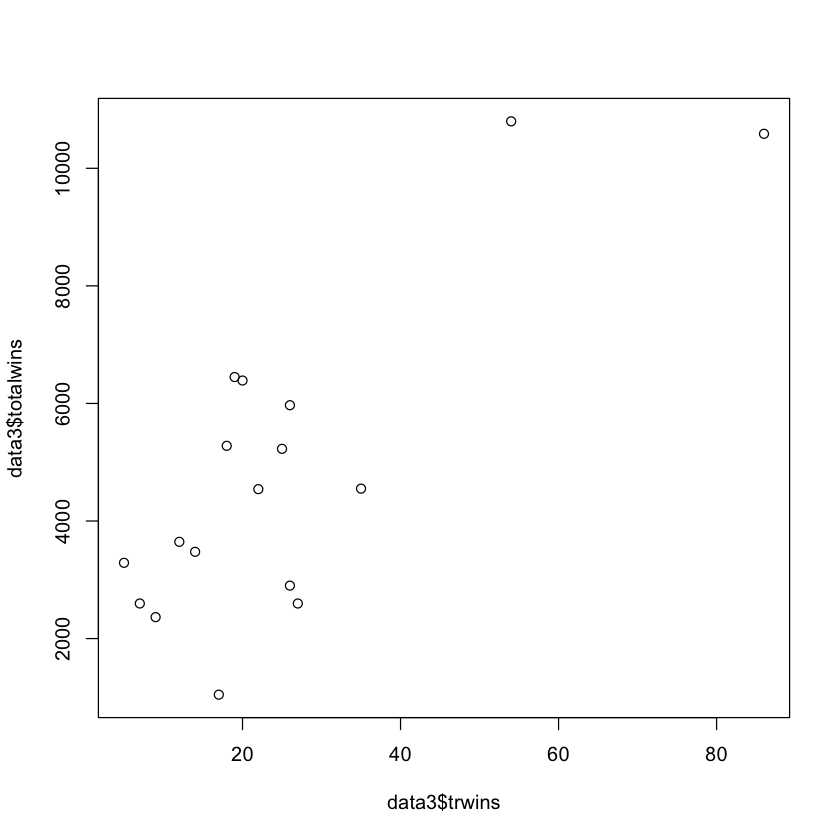

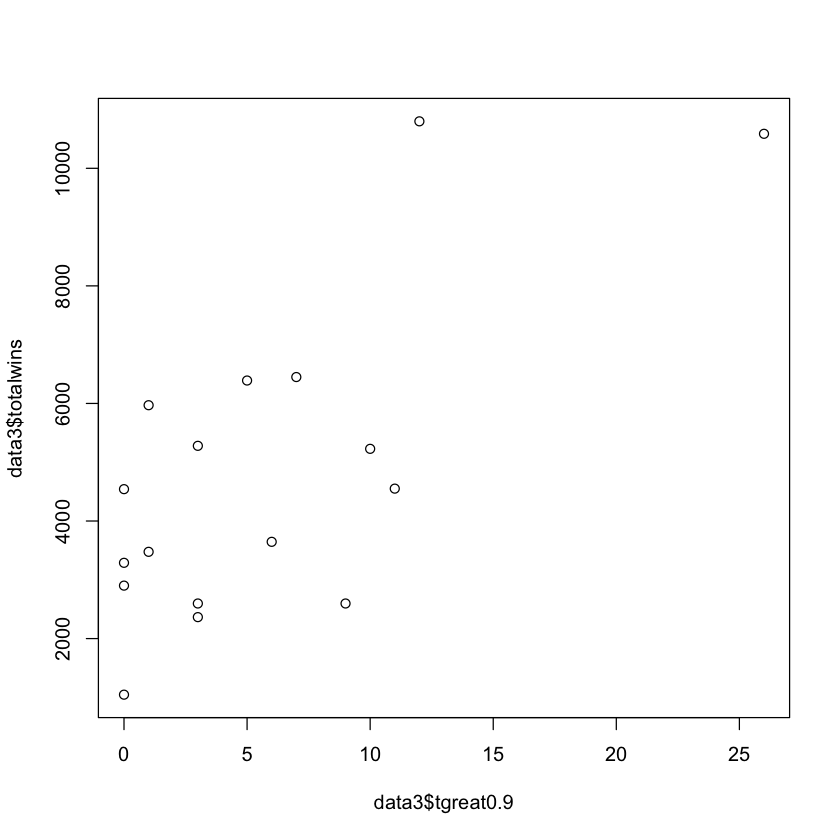

In [17]:
plot(data3$trwins,data3$totalwins)
plot(data3$tgreat0.9,data3$totalwins)

In [18]:
cor.test(data3$trwins,data3$totalwins)
cor.test(data3$tgreat0.9,data3$totalwins)


	Pearson's product-moment correlation

data:  data3$trwins and data3$totalwins
t = 5.0641, df = 15, p-value = 0.0001399
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5074025 0.9226962
sample estimates:
      cor 
0.7943266 



	Pearson's product-moment correlation

data:  data3$tgreat0.9 and data3$totalwins
t = 3.9299, df = 15, p-value = 0.001337
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3521588 0.8886671
sample estimates:
      cor 
0.7122464 
